In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from PIL import Image
import matplotlib.pyplot as plt
from IPython import embed
from torchvision.transforms import ToTensor, Compose, CenterCrop, Pad, Resize
from torch.utils.data import Dataset, DataLoader
import seaborn as sns

/Users/jan/miniconda3/envs/ai4good/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path_to_dataset ="/Users/jan/ai4good/data/dataset/"
path_to_reforestree = "/Users/jan/ai4good/data/reforestree/"

In [3]:
final_df= pd.read_csv(path_to_reforestree + "mapping/final_dataset.csv")

In [221]:
final_df

,img_path,xmin,ymin,xmax,ymax,score,img_name,tile_index,tile_xmin,tile_ymin,...,is_musacea_g,site,X_g,Y_g,updated diameter,group,updated height,AGB,carbon,id
0,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,3332.557861,19.092411,3661.390137,364.616425,0.531211,Carlos Vera Guevara RGB,3,0,8305,...,1.0,Carlos Vera Guevara RGB,5298.555843,7709.844671,10.281385,banana,0.0,4.293300,1.674387,30
1,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,3162.579834,2148.233398,3431.632324,2379.467041,0.511510,Carlos Vera Guevara RGB,3,0,8305,...,1.0,Carlos Vera Guevara RGB,5315.345160,8606.745732,13.528139,banana,0.0,7.702971,3.004159,112
2,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,2893.605713,244.011108,3095.620605,451.257812,0.251310,Carlos Vera Guevara RGB,3,0,8305,...,1.0,Carlos Vera Guevara RGB,5228.142461,7935.770200,12.732366,banana,0.0,6.769828,2.640233,179
3,Carlos Vera Guevara RGB_3_0_8305_4000_12305.png,2595.111084,1703.712402,2765.227295,1865.253418,0.217742,Carlos Vera Guevara RGB,3,0,8305,...,1.0,Carlos Vera Guevara RGB,4434.058601,8354.081799,9.867583,banana,0.0,3.933601,1.534104,93
4,Carlos Vera Guevara RGB_10_7600_7600_11600_116...,249.691879,123.626862,439.557648,302.768402,0.282849,Carlos Vera Guevara RGB,10,7600,7600,...,1.0,Carlos Vera Guevara RGB,8257.952942,7554.538338,17.825312,banana,0.0,13.862143,5.406236,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658,Nestor Macias RGB_10_7600_7600_11600_11600.png,32.623880,654.892212,242.778061,850.323608,0.397208,Nestor Macias RGB,10,7600,7600,...,0.0,Nestor Macias RGB,8928.995350,7706.132294,7.778540,cacao,2.1,7.015283,2.735960,175
4659,Nestor Macias RGB_10_7600_7600_11600_11600.png,905.988037,3196.281738,1131.675781,3427.410400,0.355852,Nestor Macias RGB,10,7600,7600,...,0.0,Nestor Macias RGB,9365.333689,8995.309621,6.843647,cacao,0.0,5.444228,2.123249,497
4660,Nestor Macias RGB_10_7600_7600_11600_11600.png,962.970642,1536.193237,1213.003906,1787.660645,0.331348,Nestor Macias RGB,10,7600,7600,...,0.0,Nestor Macias RGB,9180.659810,8052.282053,6.843647,cacao,0.0,5.444228,2.123249,201
4661,Nestor Macias RGB_10_7600_7600_11600_11600.png,295.310394,371.127441,523.021179,614.510498,0.323385,Nestor Macias RGB,10,7600,7600,...,0.0,Nestor Macias RGB,9107.213580,7434.890131,6.843647,cacao,0.0,5.444228,2.123249,400


In [4]:
my_df=  final_df[['img_name', 'Xmin', 'Ymin', 'Xmax', 'Ymax', 'carbon', 'X_d', 'Y_d', 'X_g', 'Y_g']]
my_df.head()

,img_name,Xmin,Ymin,Xmax,Ymax,carbon,X_d,Y_d,X_g,Y_g
0,Carlos Vera Guevara RGB,3332.557861,8324.092411,3661.390137,8669.616425,1.674387,3496.973999,8496.854418,5298.555843,7709.844671
1,Carlos Vera Guevara RGB,3162.579834,10453.233398,3431.632324,10684.467041,3.004159,3297.106079,10568.850220,5315.345160,8606.745732
2,Carlos Vera Guevara RGB,2893.605713,8549.011108,3095.620605,8756.257812,2.640233,2994.613159,8652.634460,5228.142461,7935.770200
3,Carlos Vera Guevara RGB,2595.111084,10008.712402,2765.227295,10170.253418,1.534104,2680.169189,10089.482910,4434.058601,8354.081799
4,Carlos Vera Guevara RGB,7849.691879,7723.626862,8039.557648,7902.768402,5.406236,7944.624763,7813.197632,8257.952942,7554.538338


In [6]:
print(np.all((my_df['Xmin']<= my_df['X_d'])&(my_df['X_d']<=my_df['Xmax'])))
print(np.all((my_df['Ymin']<= my_df['Y_d'])&(my_df['Y_d']<=my_df['Ymax'])))
print(np.max((my_df['Xmax']-my_df['Xmin'])/2 +my_df['Xmin']- my_df['X_d']))
# X_d, Y_d are the center coordinates of the bounding boxes

True
True
3.637978807091713e-12


In [5]:
sites= np.unique(final_df["img_name"])
print(sites)

['Carlos Vera Arteaga RGB' 'Carlos Vera Guevara RGB' 'Flora Pluas RGB'
 'Leonor Aspiazu RGB' 'Manuel Macias RGB' 'Nestor Macias RGB']


In [6]:
boundaries = gpd.read_file("/Users/jan/ai4good/boundaries/alphashape_boundary.shp")

In [7]:
import rasterio
import rasterio.mask

In [8]:
tree_crowns = pd.DataFrame([] ,columns=["tree_img", "coord", "x_center", "y_center",
                                        "x_field", "y_field", "site", "carbon"])

Image.MAX_IMAGE_PIXELS = None
for site in sites:
    print(site)
    df_site= my_df[my_df['img_name']==site]
    df_site= df_site.reset_index()
    print(len(df_site))
    
    boundary = boundaries[boundaries.site == site].geometry
    path = f"{path_to_reforestree}/wwf_ecuador/RGB Orthomosaics/{site}.tif"
    with rasterio.open(path) as rs:
        image_site, _ = rasterio.mask.mask(rs, boundary)
    
    image_site = np.moveaxis(image_site[:3,], 0, -1)

    print(image_site.shape, type(image_site))
    for i in range(len(df_site)):
        tree_coord= np.array(df_site.iloc[i][['Xmin', 'Ymin', 'Xmax', 'Ymax']]).astype(int)
        carbon= df_site.iloc[i]['carbon'].item()
        tree_img= image_site[tree_coord[1]:tree_coord[3], tree_coord[0]:tree_coord[2], :]
        x_center= df_site.iloc[i]['X_d'].item()
        y_center= df_site.iloc[i]['Y_d'].item()
        x_field= df_site.iloc[i]['X_g'].item()
        y_field= df_site.iloc[i]['Y_g'].item()

        new_df=pd.DataFrame([[tree_img, tree_coord, x_center, y_center, x_field, y_field, site, carbon]],
                            columns=tree_crowns.columns)
        tree_crowns=pd.concat([tree_crowns, new_df], ignore_index=True)


Carlos Vera Arteaga RGB
743
(15053, 15297, 3) <class 'numpy.ndarray'>
Carlos Vera Guevara RGB
929
(12305, 12425, 3) <class 'numpy.ndarray'>
Flora Pluas RGB
846
(15578, 16782, 3) <class 'numpy.ndarray'>
Leonor Aspiazu RGB
789
(13855, 17134, 3) <class 'numpy.ndarray'>
Manuel Macias RGB
484
(10879, 13748, 3) <class 'numpy.ndarray'>
Nestor Macias RGB
872
(13024, 15003, 3) <class 'numpy.ndarray'>


In [9]:
for site in tree_crowns.site.unique():
    tree_crowns_site = tree_crowns[tree_crowns.site == site]

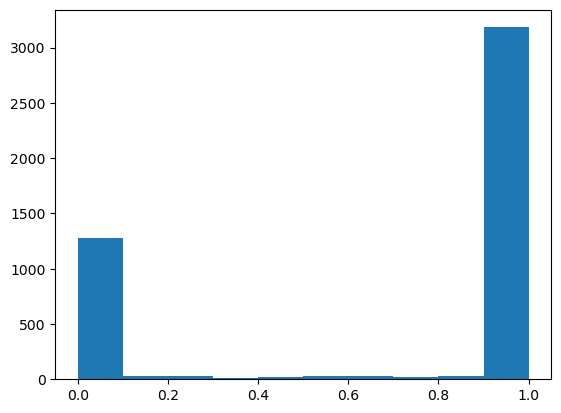

In [10]:
white_percentage = np.zeros(len(tree_crowns))
for i in range(len(tree_crowns)):
    tree_img = tree_crowns.iloc[i]["tree_img"]
    surface = tree_img.shape[0]*tree_img.shape[1]
    if surface > 0:
        white_percentage[i] = np.mean(np.all(tree_img==0, axis=2))
    elif surface == 0:
        white_percentage[i] = 1
plt.hist(white_percentage)
plt.show()

In [11]:
white_threshold = 0.8
tree_crowns_filtered = tree_crowns.loc[white_percentage < white_threshold]
tree_crowns_filtered = tree_crowns_filtered.reset_index(drop=True)
print(f"Only {len(tree_crowns_filtered)}/{len(tree_crowns)} of the bounding boxes were inside the site boundaries")

Only 1448/4663 of the bounding boxes were inside the site boundaries


In [20]:
for site in sites:
    tree_crowns_site=tree_crowns[tree_crowns["site"]==site]
    tree_crowns_filtered_site=tree_crowns_filtered[tree_crowns_filtered["site"]==site]
    print(f"{site}: {len(tree_crowns_filtered_site)}/{len(tree_crowns_site)} of the bounding boxes were inside the site boundaries")

Carlos Vera Arteaga RGB: 193/743 of the bounding boxes were inside the site boundaries
Carlos Vera Guevara RGB: 373/929 of the bounding boxes were inside the site boundaries
Flora Pluas RGB: 176/846 of the bounding boxes were inside the site boundaries
Leonor Aspiazu RGB: 264/789 of the bounding boxes were inside the site boundaries
Manuel Macias RGB: 136/484 of the bounding boxes were inside the site boundaries
Nestor Macias RGB: 306/872 of the bounding boxes were inside the site boundaries


# Rematch

In [12]:
trees = pd.read_csv(path_to_reforestree + "field_data.csv")

In [262]:
site = "Nestor Macias RGB"

trees_site = trees[trees.site == site]
tree_crowns_site = tree_crowns_filtered[tree_crowns_filtered.site == site]

In [263]:
boundary = boundaries[boundaries.site == site].geometry

In [264]:
with rasterio.open(path_to_reforestree + f"wwf_ecuador/RGB Orthomosaics/{site}.tif") as rs:
    img, _  = rasterio.mask.mask(rs, boundary)

In [265]:
tree_crowns_filtered.site.unique()
tree_crowns_filtered[tree_crowns_filtered.site == site].head()

,tree_img,coord,x_center,y_center,x_field,y_field,site,carbon
1142,"[[[57, 96, 40], [56, 89, 34], [70, 105, 49], [...","[3542, 7614, 3795, 7874]",3668.574707,7744.489872,5366.853183,7144.687954,Nestor Macias RGB,1.986641
1143,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[6852, 2738, 7083, 2993]",6967.948853,2866.274658,7687.182575,4689.728801,Nestor Macias RGB,3.893125
1144,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[6603, 2989, 6896, 3314]",6750.002197,3152.168945,7399.218321,4908.856828,Nestor Macias RGB,2.236270
1145,"[[[210, 206, 193], [205, 202, 190], [203, 201,...","[7109, 3439, 7431, 3787]",7270.460205,3613.675415,7570.028430,5207.658356,Nestor Macias RGB,4.429747
1146,"[[[161, 161, 143], [88, 92, 70], [72, 80, 62],...","[7403, 3711, 7603, 3917]",7503.718628,3814.623291,7635.537387,5258.736425,Nestor Macias RGB,3.393104


In [17]:
import ot
import ot.plot

In [266]:
dims = np.array(img.shape[1:])

In [267]:
xs = tree_crowns_site[["x_center", "y_center"]].values 
xt = trees_site[["X", "Y"]].values 

In [279]:
print('# detected tree crows: ', tree_crowns_site.shape[0])
print('# trees in field data: ', trees_site.shape[0])

#normalize x and y to avoid numerical errors

M = ot.dist(xs, xt)
M_regularized = ot.dist(xs / dims, xt / dims)

a, b = np.ones((xs.shape[0],)) / xs.shape[0], np.ones((xt.shape[0],)) / xt.shape[0]  # uniform distribution on samples
G0 = ot.emd(a, b, M_regularized, numItermax=10000)
G0_sinkhorn = ot.sinkhorn(a, b, M_regularized, 0.1, method="greenkhorn", numItermax=1000000)

#plt.figure(0)
#plt.scatter(xs[:,0], xs[:,1], s=5, c='b',label="Detected Trees")
#plt.scatter(xt[:,0], xt[:,1], s=5, c='r',label="Field Data")
#plt.legend(loc=0)
#plt.title('Source and target distributions')
#plt.gca().invert_yaxis()
#plt.show()
#plt.figure(1)

# detected tree crows:  306
# trees in field data:  872


In [203]:
#greedy matching
def get_matches_greedy(G0):
    otplan = G0.copy()
    matches = np.empty(G0.shape[0], dtype=int)

    while otplan.sum() > 0:
        i, j = np.unravel_index(otplan.argmax(), otplan.shape)
        matches[i] = j
        otplan[i, :] = 0.
        otplan[:, j] = 0.

    return matches

In [231]:
def get_matches_greedy2(G0):
    otplan = G0.copy()
    matches = np.empty(G0.shape[0], dtype=int)

    while otplan.sum() > 0:
        i, j = np.unravel_index(otplan.argmin(), otplan.shape)
        matches[i] = j
        otplan[i, :] = np.nan
        otplan[:, j] = np.nan

    return matches

In [253]:
def get_matches_greedy2_debug(G0):
    otplan = G0.copy()
    matches = np.empty(G0.shape[0], dtype=int)

    while otplan.size > 0:
        i, j = np.unravel_index(otplan.argmin(), otplan.shape)

        if j > 600:
            print("Exiting")
            return otplan
        else:
            matches[i] = j
            otplan[i, :] = np.nan
            otplan[:, j] = np.nan

    return matches

In [233]:
M.shape == G0.shape

True

In [254]:
matches = get_matches_greedy2_debug(M)

KeyboardInterrupt: 

In [236]:
np.unravel_index(M.argmin(), M.shape)

(48, 180)

In [ ]:
M

In [237]:
matches_dist[48]

180

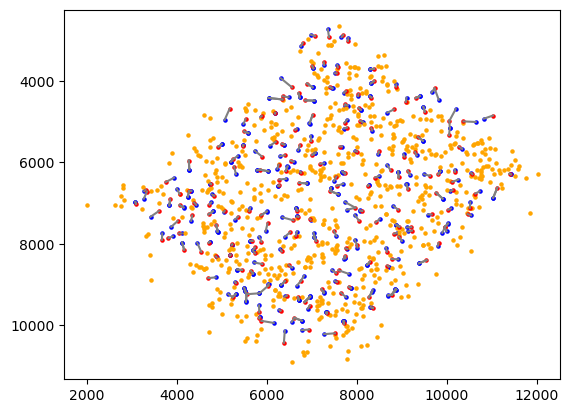

In [273]:
#matches_dist = np.argmax(G0_sinkhorn, axis=1)
#is_match_dist = np.in1d(np.arange(xt.shape[0]), matches_dist)

plt.figure()
plt.scatter(xs[:,0], xs[:,1], s=5, c='b',label="detected trees")
plt.scatter(xt[~is_match_dist,0], xt[~is_match_dist,1], s=5, c='orange',label="field data - not matched")
plt.scatter(xt[is_match_dist,0], xt[is_match_dist,1], s=5, c='r',label="Field Data - matched")
for i, match in enumerate(matches_dist):
    plt.plot([xs[i,0], xt[match,0]], [xs[i,1], xt[match,1]], c=[.5, .5, 0.5])
#ax1.legend()
plt.gca().invert_yaxis()

In [271]:
matches_emd

array([436, 203,  27, 287, 378, 461, 137, 443,  45, 656, 742, 179, 180,
       312,   3, 610, 138,  10, 132, 525, 611, 225, 131, 231, 259, 395,
       169, 521, 276, 178, 396, 693, 484, 263, 440, 129, 298, 472, 474,
       561, 447, 476, 566, 340, 427, 614,   8,  39, 386, 714, 604, 106,
       337,  73, 299, 351, 123, 861, 586,  62, 719, 193, 752, 213, 453,
       102,  66, 379, 294, 288, 339, 553,  63,  16, 327, 196,  17, 812,
       110, 555, 459, 289, 510, 156, 240,  68,  72,  59, 108,  32,  65,
       244, 201, 822, 121, 429, 147, 143, 319, 517, 492, 322, 558,  58,
        96,   0, 394, 359, 316, 115,  24, 810,   5,  90, 318, 485, 745,
        41, 528, 375, 186, 397, 255, 182, 181,  50,   4,  89, 224, 257,
       175, 177,  85, 530,  44, 532, 529,  47,  51, 400, 369, 165,  14,
       161, 249, 623, 126, 495, 349, 587, 183, 736, 477, 112, 119, 210,
       511,  77, 105, 185, 189, 194, 341, 562, 215, 406,  35, 388, 258,
       237, 174, 236, 695, 601,  84, 306, 404, 328, 415, 680, 20

In [283]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots 

In [285]:
matches_emd = get_matches_greedy(G0)
matches_sinkhorn = get_matches_greedy(G0_sinkhorn)
matches_dist = np.argmin(M, axis=1)

is_match = np.in1d(np.arange(xt.shape[0]), matches_emd)
is_match_sinkhorn = np.in1d(np.arange(xt.shape[0]), matches_sinkhorn)
is_match_dist = np.in1d(np.arange(xt.shape[0]), matches_dist)

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True, sharey=True, width_ratios=1.5)
ax0.scatter(xs[:,0], xs[:,1], s=5, c='b',label="detected trees")
ax0.scatter(xt[~is_match,0], xt[~is_match,1], s=5, c='orange',label="field data - not matched")
ax0.scatter(xt[is_match,0], xt[is_match,1], s=5, c='r',label="Field Data - matched")
for i, match in enumerate(matches_emd):
    ax0.plot([xs[i,0], xt[match,0]], [xs[i,1], xt[match,1]], c=[.5, .5, 0.5])
#ax0.legend()
ax0.invert_yaxis()
ax0.set_title('Matched Source and target distributions')

ax1.scatter(xs[:,0], xs[:,1], s=5, c='b',label="detected trees")
ax1.scatter(xt[~is_match_sinkhorn,0], xt[~is_match_sinkhorn,1], s=5, c='orange',label="field data - not matched")
ax1.scatter(xt[is_match_sinkhorn,0], xt[is_match_sinkhorn,1], s=5, c='r',label="Field Data - matched")
for i, match in enumerate(matches_sinkhorn):
    ax1.plot([xs[i,0], xt[match,0]], [xs[i,1], xt[match,1]], c=[.5, .5, 0.5])
#ax1.legend()
ax1.invert_yaxis()
ax1.set_title('Matched Source and target distributions sinkhorn')

ax2.scatter(xs[:,0], xs[:,1], s=5, c='b',label="detected trees")
ax2.scatter(xt[~is_match_dist,0], xt[~is_match_dist,1], s=5, c='orange',label="field data - not matched")
ax2.scatter(xt[is_match_dist,0], xt[is_match_dist,1], s=5, c='r',label="Field Data - matched")
for i, match in enumerate(matches_dist):
    ax2.plot([xs[i,0], xt[match,0]], [xs[i,1], xt[match,1]], c=[.5, .5, 0.5])
#ax1.legend()
ax2.invert_yaxis()
ax2.set_title('Matched Source and target distributions dist')

TypeError: object of type 'float' has no len()

<Figure size 640x480 with 0 Axes>

In [76]:
np.in1d(np.arange(xt.shape[0]), matches)
ax1.scatter(xs[:,0], xs[:,1], s=5, c='b',label="detected trees")
ax1.scatter(xt[~is_match_sinkhorn,0], xt[~is_match_sinkhorn,1], s=5, c='orange',label="field data - not matched")
ax1.scatter(xt[is_match_sinkhorn,0], xt[is_match_sinkhorn,1], s=5, c='r',label="Field Data - matched")
for i, match in enumerate(matches_sinkhorn):
    ax1.plot([xs[i,0], xt[match,0]], [xs[i,1], xt[match,1]], c=[.5, .5, 0.5])
#ax1.legend()
ax1.invert_yaxis()
ax1.set_title('Matched Source and target distributions sinkhorn')

array([ True, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True, False,  True, False, False, False, False, False,
       False,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True, False,  True, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False,  True, False,  True, False,  True,  True, False, False,
        True,  True,

Text(0.5, 1.0, 'OT matrix G0')

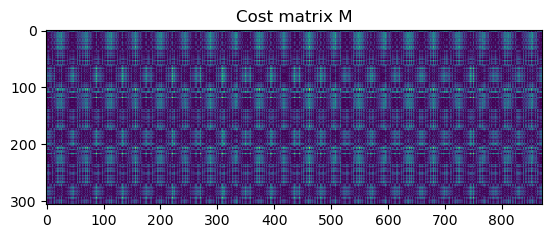

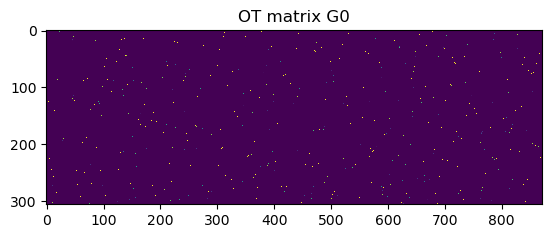

In [276]:
plt.figure(2)
plt.imshow(M, interpolation='nearest')
plt.title('Cost matrix M')

plt.figure(3)
plt.imshow(G0, interpolation='nearest')
plt.title('OT matrix G0')

In [79]:
print(G0[0][G0[0]>0])
print(np.argmax(G0[0]), np.max(G0[0]))

[0.00033924 0.00126743 0.00126743 0.00016962 0.00067376]
552 0.0012674271229404308


# Export as pytorch tensors

In [184]:
transform= Compose([ToTensor(), CenterCrop(800)])
tree_crowns_final=pd.DataFrame([], columns=["tree_img", "site", "carbon"])

for i in range(len(tree_crowns_filtered)):
    tree_img= tree_crowns_filtered.iloc[i]["tree_img"]
    transformed_img= transform(tree_img)
    site = tree_crowns_filtered["site"][i]
    carbon= tree_crowns_filtered["carbon"][i]

    new_df=pd.DataFrame([[transformed_img, site, carbon]], columns=tree_crowns_final.columns)
    tree_crowns_final=pd.concat([tree_crowns_final, new_df], ignore_index=True)

print(len(tree_crowns_final), len(tree_crowns_filtered))



1529 1529


In [185]:
print(tree_crowns_final["tree_img"][0].shape)
tree_crowns_final.head()

torch.Size([3, 800, 800])


,tree_img,site,carbon
0,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",Carlos Vera Arteaga RGB,1.674387
1,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",Carlos Vera Arteaga RGB,3.004159
2,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",Carlos Vera Arteaga RGB,5.406236
3,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",Carlos Vera Arteaga RGB,3.079940
4,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",Carlos Vera Arteaga RGB,5.825807


In [189]:
train, val, test= create_split_dataframe("", tree_crowns_filtered, [4,1,1])
print(len(train), len(val), len(test))


1017 268 244


In [191]:
class TreeCrown(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform= transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, item):
        """
        Loading samples based on the information contained
        in self.df.
        """
        site = self.df["site"][item]
        image = self.df["tree_img"][item]
        carbon = self.df["carbon"][item]


        if self.transform is not None:
            image = self.transform(image)

        return image, carbon, site


In [192]:
def train_val_test_dataset(data:pd.DataFrame, splits, transform):
    train, val, test= create_split_dataframe("", data, splits)
    train_dataset= TreeCrown(train, transform)
    val_dataset = TreeCrown(val, transform)
    test_dataset = TreeCrown(test, transform)

    return train_dataset, val_dataset, test_dataset

def train_val_test_dataloader(data: pd.DataFrame, splits, batch_size, transform=None):
    train_dataset, val_dataset, test_dataset= train_val_test_dataset( data, splits, transform)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    return train_loader, val_loader, test_loader


In [204]:
train_loader, val_loader, test_loader= train_val_test_dataloader(tree_crowns_final, splits=[4,1,1], batch_size=32, transform=Resize(224))

In [214]:
tree_img_sampled, carbon_sample, site_sample= next(iter(train_loader))
print(tree_img_sampled.shape, carbon_sample.shape)

torch.Size([32, 3, 224, 224]) torch.Size([32])
